# Оценка бинарной классификации
Бинарная классификация одна из наиболее важных и часто встречаемых классов задач. Причем не только модели машинного обучения но и другие тесты также могут выдавать результат в виде бинарных классов. Например, медицинский тест на наличие заболевания (больной/здоровый), радиолокатор для определения вражеских объектов (свой/чужой) также являются бинарными классификаторами.

По этой причине важно оценить модель правильно и иногда несколькими разными способами. В этом материале мы рассмотрим несколько таких методов оценки. Для этого мы сначала обучим модель логистической регрессии, чтобы потом её оценить разными методами. В качестве такой задачи будем использовать набор данных <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html">breast cancer</a> (рак груди) доступный в sklearn. Данный набор содержит данные по 569 пациентам, у которых выявлена опухоль груди, из которых 212 являются злокачественными (malignant) и 357 доброкачественными (benign). Данные содержат 30 признаков. Необходимо создать модель бинарной классификации, которая будет различать злокачественную опухоль от доброкачественной. Злокачественная опухоль соответствует отрицательным (0), а доброкачественна к положительным (1) классам.

Для начала симпортируем все необходимые модули.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

С помощью функции `datasets.load_breast_cancer` загрузим набор данных и посмотрим их количество.

In [2]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
print('X shape                :', X.shape)
print('y shape                :', y.shape)
print('target names           :', breast_cancer.target_names)
print('positve (benign) cancer:', np.sum(y))

X shape                : (569, 30)
y shape                : (569,)
target names           : ['malignant' 'benign']
positve (benign) cancer: 357


Как обычно разобьем данные на тренировочный и тестовый наборы в пропорции 75% на 25%. При этом зафиксируем генератор случайных чисел, чтобы получать воспроизводимые результаты.

In [3]:
random_state = np.random.RandomState(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=random_state)

Теперь можно создать модель логистической регрессии и обучить её.

In [4]:
classifier = LogisticRegression(random_state=random_state)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2',
          random_state=<mtrand.RandomState object at 0x0000025A9FD26B88>,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

С помощью этой модели можно предсказать тип опухоли

In [5]:
y_test_pred = classifier.predict(X_test)
y_test_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0])

Введем несколько определений, которые будем использовать дальше

|      Основные показатели                                           |
|----------------|---------------------------------------------------|
|  $T_p$         | True positive - истинно положительные результаты  |
|  $T_n$         | True negative - истинно отрицательные результаты  |
|  $F_p$         | False positive - ложно положительные результаты   |
|  $F_n$         | False negative - ложно отрицательные результаты   |


## Матрица заблуждений (confusion matrix)
Для начала будем оценивать результаты модели классификации с помощью так называемой матрицы заблуждений (confusion matrix). Матрица заблуждений показывает количество верных и ошибочных предсказаний для каждого класса. В задаче бинарной классификации матрица имеет размер 2x2. В sklearn для получения этой матрицы используется функция `confusion_matrix` из модуля `sklearn.metrics`. Для модели бинарной классификации она возвращает матрицу, у которой ячейка [0, 0] содержит количество истинно отрицательных (true negative, $T_n$), ячейка [1, 1] содержит количество истинно положительных (true positive, $T_p$) результатов. Ячейки [1, 0] и [0, 1] содержат количество ложноотрицательных (false negative, $F_n$) и ложноположительных (false positive, $F_p$) результатов соответственно.

In [6]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test, y_test_pred)
print(cmat)

[[52  1]
 [ 5 85]]


Матрица заблуждений лучше всего визуализируется с помощью тепловой карты (heatmap). Для создания тепловой карты воспользуемся функцией `heatmap` из библиотеки `seaborn`.

(90, 86)

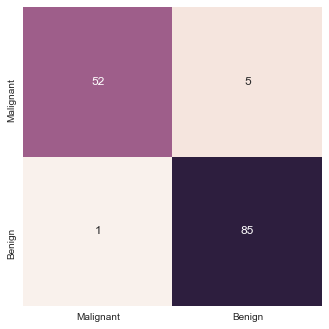

In [7]:
target_names = ['Malignant', 'Benign']
sns.heatmap(cmat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
y_test.sum(), y_test_pred.sum()

## Точность, полнота и f1-score (precision, recall & f1-score)
В информационном поиске точность это мера релевантности результатов поиска. Например, если из всех результатов поиска только 60% релевантны запросу, то точность составляет 60%. В информационном поиске полнота это мера доли релевантных ответов в результате поиска относительно всех релевантных ответов. Например, если в целом в базе есть 100 релевантных запросу документов, из которых в результате поиска вернулось только 40, то полнота равна 40%. 

Модель, у которой высокая полнота, но низкая точность, возвращает очень много результатов, среди которых много неверных ответов. Например, если модель может определить всех истинно больных но при этом очень часто определяет здорового человека больным, то у нее будет высокая полнота но низкая точность. И наоборот, если у модели высокая точность но низкая полнота, то она будет редко определять положительные классы, но эти кассы будут в большинстве случаев корректно классифицированы. Например, если модель не может определить всех больных, но при этом никогда не определяет здорового человека больным, то у этой модели высокая точность но низкая полнота.

Точность (P) и полнота (R) определяются следующими формулами
$$
\Large 
\begin{align}
P &= \frac{T_p}{T_p + F_p} \\
R &= \frac{T_p}{T_p + F_n}
\end{align}
$$

Иногда межет быть желательно найти баланс между этими показателями. В таком случае можно использовать меру F1-score, которая является <a href="https://ru.wikipedia.org/wiki/%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B5_%D0%B3%D0%B0%D1%80%D0%BC%D0%BE%D0%BD%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5">гармоническим средним</a> (harmonic mean) значением между точность и полнотой:
$$
\Large F1 = 2 \frac{PR}{P + R}
$$

Функция `classification_report` возвращает точность (precision), полноту (recall) и f1-score для каждого класса. Колонка support отображает количество данных соответсующему классу в данных.

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred, target_names=target_names))

             precision    recall  f1-score   support

  Malignant       0.91      0.98      0.95        53
     Benign       0.99      0.94      0.97        90

avg / total       0.96      0.96      0.96       143



# ROC-кривая (ROC curve)
Модель бинарной классификации может возвращать вероятность принадлежности одному из двух классов. Чтобы отнести пример к тому или другому классу необходимо подобрать порог вероятности, выше которого все предсказания будут считаться положительными, а ниже этого порога отрицательными. Выбор этого порогового значения позволяет балансировать точность и полноту.

ROC-кривая (англ. receiver operating characteristic, рабочая характеристика приёмника) - график, позволяющий оценить качество бинарной классификации при изменении порога решений (decision threshold). Использование этой кривой очень распространено. Изначально кривая была создана для оценки работы военных радаров (отсюда и название). Вскоре её начали использовать для оценки моделей в психологии, медицине, радиологии, метереологии и т.д. 

ROC-кривая показывает зависимость изменения полноты по отношению к ложноположительным результатам при изменении порога верятности. Численно ROC-кривая характеризуется размером площади под кривой (ROC area under curve, ROC-AUC). В идеале эта площадь должна быть равна единице, тогда модель будет находить все истинно положительные результаты (полнота 100%). Для сравнения вместе ROC-кривой всегда рисуется диагональная линия, которая соответствует модели, которая возвращает ответы случайно в пропорции 50/50. ROC-AUC значение этой кривой равно 0.5. ROC-кривая любой другой модели должна быть выше этой линии иначе никакой ценности эта модель не будет из себя представлять. Можно попробовать интерактивные примеры ROC-кривой по ссылкам <a href="http://www.navan.name/roc/">Understanding ROC curves</a> и <a href="http://arogozhnikov.github.io/2015/10/05/roc-curve.html">ROC curve demonstration</a>.

Для получения ROC-кривой в sklearn используется функция `roc_curve` из модуля `sklearn.metrics`. ROC-AUC можно вычислить с помощью функции `roc_auc_score` из модуля `sklearn.metrics`.

In [9]:
y_test_prob = classifier.predict_proba(X_test)[:, 1]

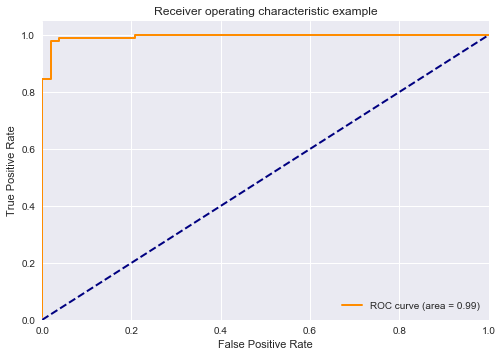

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob, pos_label=1)
score = roc_auc_score(y_test, y_test_prob)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

Само значение порога вероятности в графике не отображается. Можно выбрать нужный порог и отобразить точку на графике самостоятельно. Например, следующий код вычисляет f1-score для каждого порога, который вернула функция `roc_curve`, и выбирает тот порог, при котором f1-score достигает максимума.

best f1 score          : 0.983240223464
best f1 score threshold: 0.311596391406
false positive rate    : 0.0377358490566
true positive rate     : 0.977777777778


C:\Users\Rustam\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


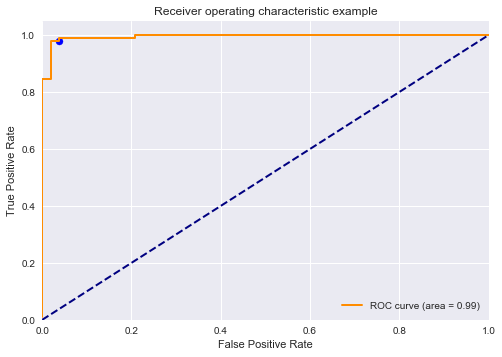

In [11]:
from sklearn.metrics import f1_score

f1 = [f1_score(y_test, (y_test_prob > t).astype(int)) for t in thresholds]
best_threshold_idx = np.argmax(f1)
best_threshold = thresholds[best_threshold_idx]

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.scatter(fpr[best_threshold_idx], tpr[best_threshold_idx], s=50, c='b')

print('best f1 score          :', np.max(f1))
print('best f1 score threshold:', best_threshold)
print('false positive rate    :', fpr[best_threshold_idx])
print('true positive rate     :', tpr[best_threshold_idx])

## Precision-recall кривая
Иногда в задачах классификации классы могут быть сильно несбалансированы. Например, допустим, что при определении мошеннических транзакций (fraud detection) лишь одна из тысячи транзакций являются мошенническими (т.е. 0.1%). Если создать модель, которая всегда будет возвращать 0 (т.е. транзакция не мошенническая), то она будет работать с точностью 99.9%. Однако очевидно, что эта модель бесполезная. Для оценки моделей с такими сильно несбалансированными значениями классов можно использовать precision-recall кривую. Кривая показывает зависимость изменения точности по отношению к полноте при изменении порога верятности. Чтобы увеличить полноту необходимо понижать порог вероятности. Однако это ведет к сниженгию точности, так как при этом будут появляться все больше ложно положительных результатов.

In [12]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_test_prob)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 1.00


precision [ 0.89108911  0.89        0.8989899   0.90816327  0.91752577]
recall [ 1.          0.98888889  0.98888889  0.98888889  0.98888889]
thresholds [ 0.04947608  0.05042727  0.0564132   0.05862503  0.07422455]


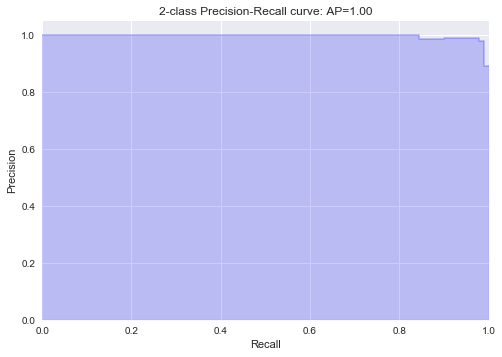

In [13]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_test_prob)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
print('precision', precision[:5])
print('recall', recall[:5])
print('thresholds', thresholds[:5])